In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
#Required Libraries
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 15 # Defining the number of locations
locations = [(random.randint(0,100) ,random.randint(0,100)) for i in range(num_locations)]
depot = (35,35)
num_vehicles = 5

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
#Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.indices)
toolbox.register("population", tools.initRepeat,list,toolbox.individual)

In [ ]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3) # Register the selection function using tournament selection

In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	490.208	6.42945
1  	230   	474.249	12.1274
2  	241   	467.08 	7.46088
3  	234   	461.026	7.46088
4  	229   	452.127	14.2181
5  	239   	453.497	12.1455
6  	222   	445.646	9.90248
7  	238   	438.451	12.0237
8  	227   	440.553	10.9173
9  	217   	433.804	9.94742
10 	221   	428.93 	9.66997
11 	235   	430.254	12.814 
12 	221   	419.556	8.01565
13 	226   	424.824	5.34034
14 	225   	423.437	8.86246
15 	212   	410.676	13.8034
16 	225   	404.201	11.5927
17 	219   	388.233	15.5887
18 	244   	366.432	13.7839
19 	226   	348.879	15.4044
20 	223   	342.504	16.4513
21 	241   	341.031	14.4312
22 	214   	335.791	13.3366
23 	226   	332.866	13.4843
24 	224   	330.108	13.9397
25 	220   	330.722	15.6878
26 	231   	329.121	17.4681
27 	226   	331.202	13.8166
28 	241   	331.785	13.1379
29 	232   	332.037	14.2239
30 	235   	332.81 	15.9947
31 	231   	327.822	13.8666
32 	234   	324.368	12.5498
33 	249   	324.471	12.3185
34 	229   	323.822	11.7236
35 	239   	323.231	14.9727
3

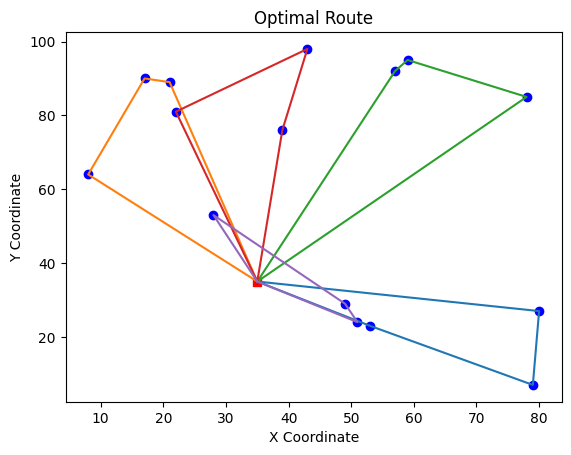

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 309, stats=stats, halloffame=hof)
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
     main()